In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from data_named import variable_values, data

In [5]:
raw_data = pd.read_csv('data_num.csv', delimiter=",")
raw_data = pd.DataFrame(raw_data)
#data = pd.read_csv('data_dem.csv', delimiter=",")
#data = pd.DataFrame(data)

data

,Duration (in seconds),UserLanguage,participant_number,age,gender,ethnicity,political_orientation,political_orientation_text,achieved_education,achieved_education_text,...,bothered_post,uneasy_post,uncomfortable_post,sandwich,diet,diet_text,reason_for_choice,labels_attention,feeling_observed,did_value_activation_affect_choice
1,2522,FR,59,24,2,2,3,NaN,3,NaN,...,0,0,0,1,3,NaN,j'aime le pesto; j'aime les légumes; sandwich ...,1,2,control
4,1291,EN,106,22,1,1,1,NaN,3,NaN,...,90,90,46,1,3,NaN,Because I had just said that I care about CO2 ...,1,1,1.0
6,2915,EN,52,21,2,1,1,NaN,2,NaN,...,0,0,37,3,3,NaN,I like ham and cheese; and the pesto one seeme...,1,2,control
8,5843,FR,137,21,2,1,2,NaN,3,NaN,...,3,5,4,3,3,NaN,J'avais une envie de jambon,1,2,2.0
9,1030,FR,109,22,2,1,2,NaN,3,NaN,...,0,0,0,1,3,NaN,il avait l'air bon j'adore le pesto,1,2,2.0
12,3979,FR,60,24,2,1,2,NaN,3,NaN,...,0,0,7,3,7,Pas de régime particulier,J'hésitais entre jambon/fromage et viande séch...,1,2,control
14,2989,FR,110,31,1,1,1,NaN,4,NaN,...,0,0,0,4,7,Fléxitarien,Rare que je puisse manger de la viande séché,1,2,2.0
17,1362,EN,69,25,1,1,1,NaN,3,NaN,...,9,5,25,2,3,NaN,Because I didn't want to eat meat and the humm...,1,3,control
18,1055,FR,65,22,1,1,3,NaN,2,NaN,...,0,0,0,3,3,NaN,par élimination : je préfère la viande; je n'a...,1,2,control
20,4172,FR,127,26,1,1,4,absente,4,NaN,...,66,1,67,2,3,NaN,Je pense que la couleur orange des carottes at...,1,1,1.0


## Preprocessing

In [46]:
#create a copy of the data
df = data.copy()
#df.drop(df.columns[0],axis=1,inplace=True)
#df.drop(['Duration (in seconds)', 'participant_number', 'political_orientation_text','video', 'achieved_education','T_academic_performance','Q25_First Click','diet', 'reason_for_choice' ],axis=1, inplace=True)
df.fillna(0,inplace=True)#replace Nan value with 0

df['value_activation'] = df['value_activation'].replace([0,1],['No', 'Yes'])#make value activation a categorical variable

#add column for post-pre dissonance
df['bothered_difference'] = df['bothered_post'] - df['bothered_pre']
df['uneasy_difference'] = df['uneasy_post'] - df['uneasy_pre']
df['uncomfortable_difference'] = df ['uncomfortable_post'] - df['uncomfortable_pre']

#convert dissonance to a 1-7 scale
df['bothered_pre'] = df['bothered_pre']*7/100
df['bothered_post'] = df['bothered_post']*7/100
df['uneasy_pre'] = df['uneasy_pre']*7/100
df['uneasy_post'] = df['uneasy_post']*7/100
df['uncomfortable_pre'] = df['uncomfortable_pre']*7/100
df['uncomfortable_post'] = df ['uncomfortable_post']*7/100
df['bothered_difference'] = df['bothered_difference']*7/100
df['uneasy_difference'] = df['uneasy_difference']*7/100
df['uncomfortable_difference'] = df['uncomfortable_difference']*7/100
df = df.astype({'bothered_pre': int, 'bothered_post': int, 'uneasy_pre': int, 'uneasy_post': int, 'uncomfortable_pre': int,'uncomfortable_post': int, 'bothered_difference':int, 'uneasy_difference': int, 'uncomfortable_difference': int})

#df.reset_index()
df[:5]

,Duration (in seconds),UserLanguage,participant_number,age,gender,ethnicity,political_orientation,political_orientation_text,achieved_education,achieved_education_text,...,sandwich,diet,diet_text,reason_for_choice,labels_attention,feeling_observed,did_value_activation_affect_choice,bothered_difference,uneasy_difference,uncomfortable_difference
1,2522,FR,59,24,2,2,3,0,3,0,...,1,3,0,j'aime le pesto; j'aime les légumes; sandwich ...,1,2,control,0,0,0
4,1291,EN,106,22,1,1,1,0,3,0,...,1,3,0,Because I had just said that I care about CO2 ...,1,1,1.0,5,4,0
6,2915,EN,52,21,2,1,1,0,2,0,...,3,3,0,I like ham and cheese; and the pesto one seeme...,1,2,control,0,0,1
8,5843,FR,137,21,2,1,2,0,3,0,...,3,3,0,J'avais une envie de jambon,1,2,2.0,-1,-2,0
9,1030,FR,109,22,2,1,2,0,3,0,...,1,3,0,il avait l'air bon j'adore le pesto,1,2,2.0,0,0,0


In [47]:
df.describe(include='all')

,Duration (in seconds),UserLanguage,participant_number,age,gender,ethnicity,political_orientation,political_orientation_text,achieved_education,achieved_education_text,...,sandwich,diet,diet_text,reason_for_choice,labels_attention,feeling_observed,did_value_activation_affect_choice,bothered_difference,uneasy_difference,uncomfortable_difference
count,18.000000,18,18.000000,18.000000,18.000000,18.000000,18.000000,18.0,18.000000,18.0,...,18.000000,18.000000,18.0,18,18.000000,18.000000,18,18.000000,18.000000,18.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,3.0,NaN,2.0,...,NaN,NaN,3.0,18,NaN,NaN,3,NaN,NaN,NaN
top,NaN,FR,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,...,NaN,NaN,0.0,j'aime le pesto; j'aime les légumes; sandwich ...,NaN,NaN,control,NaN,NaN,NaN
freq,NaN,14,NaN,NaN,NaN,NaN,NaN,16.0,NaN,17.0,...,NaN,NaN,16.0,1,NaN,NaN,8,NaN,NaN,NaN
mean,2707.777778,NaN,81.055556,23.333333,1.555556,1.166667,2.000000,NaN,3.222222,NaN,...,2.388889,3.444444,NaN,NaN,1.166667,1.833333,NaN,0.388889,0.055556,0.277778
std,1501.838229,NaN,40.103502,2.376354,0.511310,0.514496,1.028992,NaN,1.308594,NaN,...,1.144752,1.293523,NaN,NaN,0.514496,0.514496,NaN,1.377931,1.109967,0.751904
min,1030.000000,NaN,6.000000,21.000000,1.000000,1.000000,1.000000,NaN,2.000000,NaN,...,1.000000,3.000000,NaN,NaN,1.000000,1.000000,NaN,-1.000000,-2.000000,0.000000
25%,1293.500000,NaN,59.250000,22.000000,1.000000,1.000000,1.000000,NaN,3.000000,NaN,...,1.000000,3.000000,NaN,NaN,1.000000,2.000000,NaN,0.000000,0.000000,0.000000
50%,2718.500000,NaN,78.000000,23.000000,2.000000,1.000000,2.000000,NaN,3.000000,NaN,...,3.000000,3.000000,NaN,NaN,1.000000,2.000000,NaN,0.000000,0.000000,0.000000
75%,3546.000000,NaN,109.750000,24.000000,2.000000,1.000000,2.750000,NaN,3.000000,NaN,...,3.000000,3.000000,NaN,NaN,1.000000,2.000000,NaN,0.000000,0.000000,0.000000


In [48]:
df.shape

(18, 31)

In [49]:
df1=df.drop(['Duration (in seconds)', 'participant_number', 'political_orientation_text', 'achieved_education','T_academic_performance','diet', 'reason_for_choice' ],axis=1)
df1

,UserLanguage,age,gender,ethnicity,political_orientation,achieved_education_text,bothered_pre,uneasy_pre,uncomfortable_pre,C_time_alone,...,uneasy_post,uncomfortable_post,sandwich,diet_text,labels_attention,feeling_observed,did_value_activation_affect_choice,bothered_difference,uneasy_difference,uncomfortable_difference
1,FR,24,2,2,3,0,0,0,0,1.0,...,0,0,1,0,1,2,control,0,0,0
4,EN,22,1,1,1,0,0,1,2,test,...,6,3,1,0,1,1,1.0,5,4,0
6,EN,21,2,1,1,0,0,0,1,1.0,...,0,2,3,0,1,2,control,0,0,1
8,FR,21,2,1,2,0,1,2,0,test,...,0,0,3,0,1,2,2.0,-1,-2,0
9,FR,22,2,1,2,0,0,0,0,test,...,0,0,1,0,1,2,2.0,0,0,0
12,FR,24,2,1,2,0,0,0,0,1.0,...,0,0,3,Pas de régime particulier,1,2,control,0,0,0
14,FR,31,1,1,1,0,0,0,0,test,...,0,0,4,Fléxitarien,1,2,2.0,0,0,0
17,EN,25,1,1,1,0,0,0,0,1.0,...,0,1,2,0,1,3,control,0,0,1
18,FR,22,1,1,3,0,0,0,0,1.0,...,0,0,3,0,1,2,control,0,0,0
20,FR,26,1,1,4,0,0,0,0,test,...,0,4,2,0,1,1,1.0,3,0,3


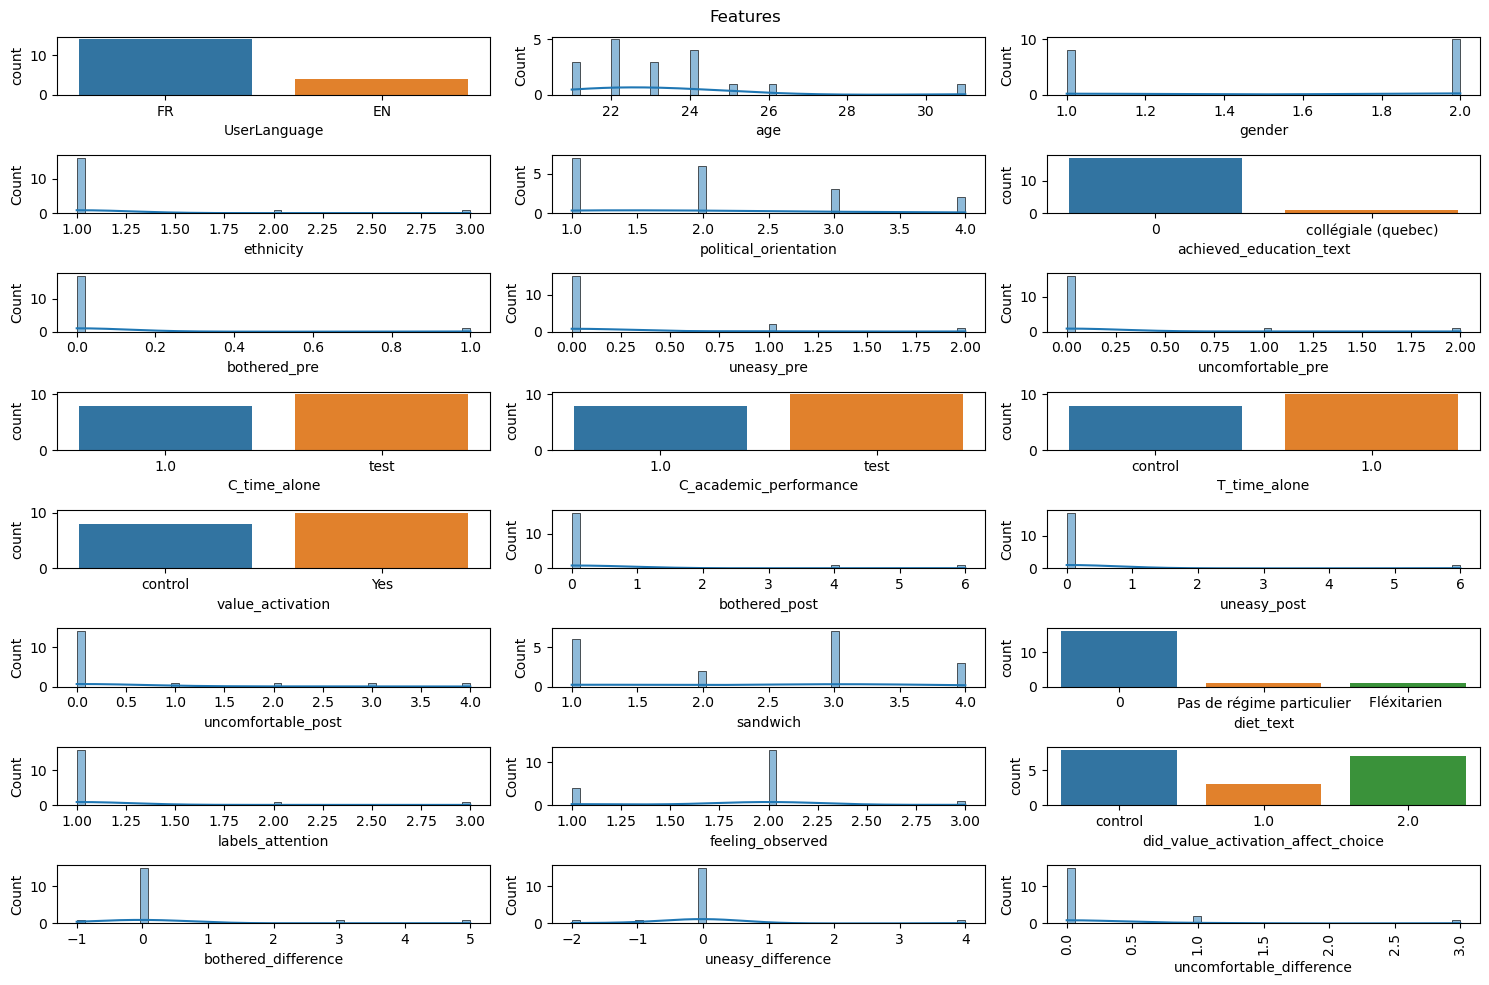

In [55]:
import seaborn as sns

#univariate analysis



def plot_features(df):
    """
    Plots all features individually in the same figure
    
    Parameters
    ----------
    df : DataFrame
         Containing all data
    """    
    df = df.copy()
    
    
    def plot_features(df, title):
    
        continuous_cols = list(df._get_numeric_data().columns)
        categorical_cols = list(set(df.columns) - set(continuous_cols))
        fig, axes = plt.subplots(8, 3, figsize=(15,10))
        for i, col in enumerate(df.columns):
            ax = axes[i // 3, i % 3]
            data = df[~df[col].isna()]
            if col in continuous_cols:
                sns.histplot(data=data[col], bins=50, ax=ax, kde=True) #Filter out nan values in the features
                plt.xticks(rotation=90)
            elif col in categorical_cols:
                sns.countplot(data=data, x=col, ax=ax)
                plt.xticks(rotation=90)
            else:
                print(col)
        fig.suptitle(title)
        fig.tight_layout()
    
        
    plot_features(df,"Features")
    plt.show()
    
plot_features(df1)

<Axes: xlabel='sandwich', ylabel='Count'>

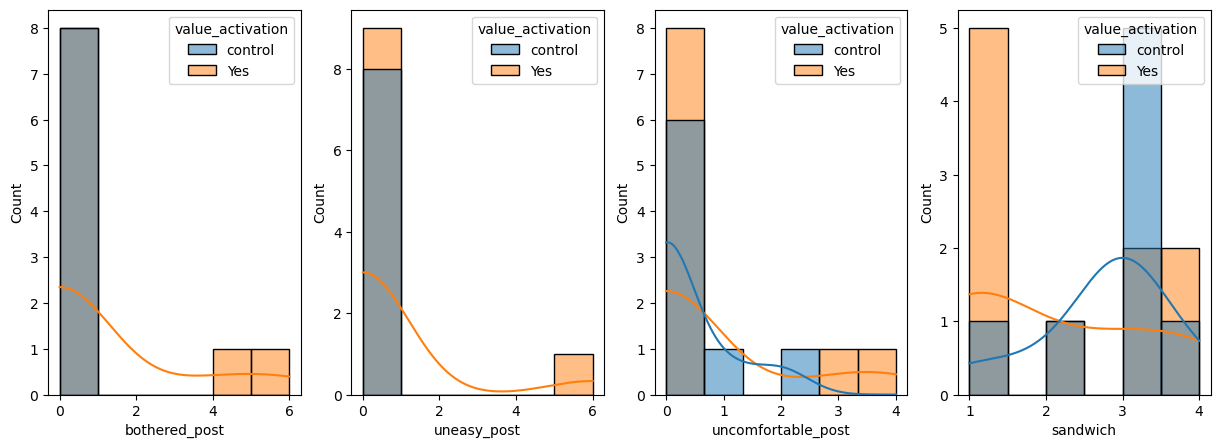

In [51]:
fig, axes = plt.subplots(1, 4,figsize=(15,5))

sns.histplot(data=df,x='bothered_post',hue='value_activation', kde= True, ax=axes[0])
sns.histplot(data=df,x='uneasy_post',hue='value_activation', kde= True, ax=axes[1])
sns.histplot(data=df,x='uncomfortable_post',hue='value_activation', kde= True, ax=axes[2])
sns.histplot(data=df,x='sandwich', hue='value_activation', kde= True, ax=axes[3])


<Axes: xlabel='uncomfortable_difference', ylabel='Count'>

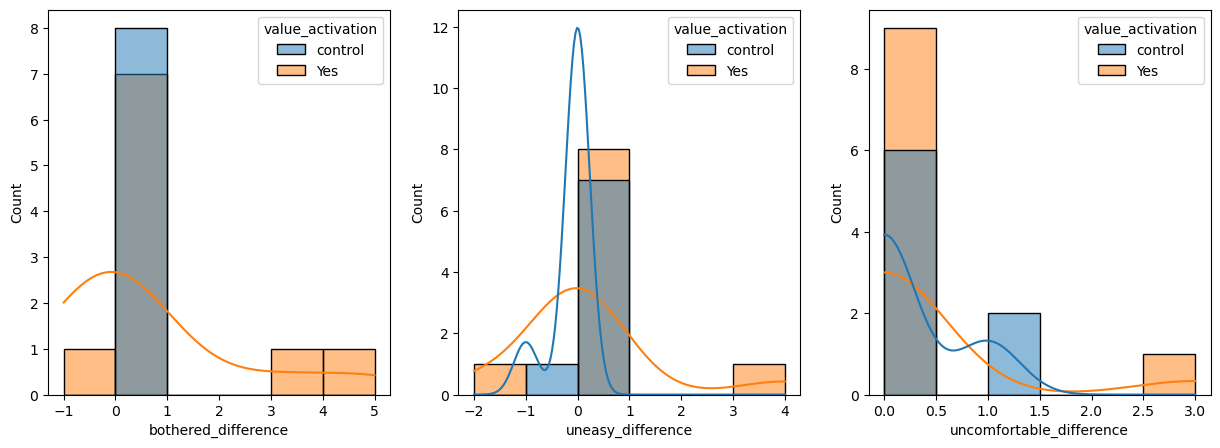

In [52]:
fig, axes = plt.subplots(1, 3,figsize=(15,5))

sns.histplot(data=df,x='bothered_difference',hue='value_activation', kde= True, ax=axes[0])
sns.histplot(data=df,x='uneasy_difference',hue='value_activation', kde= True, ax=axes[1])
sns.histplot(data=df,x='uncomfortable_difference',hue='value_activation', kde= True, ax=axes[2])

/tmp/ipykernel_27183/1787290802.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = df.groupby('value_activation').mean()


Text(0, 0.5, 'mean')

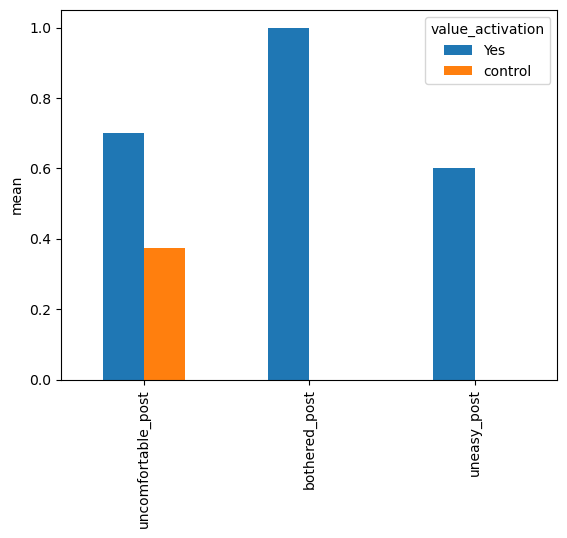

In [53]:
mean_df = df.groupby('value_activation').mean()
mean_df1 = mean_df[['uncomfortable_post','bothered_post','uneasy_post']]
mean_df1 = mean_df1.transpose()

ax = mean_df1.plot.bar()
ax.set_ylabel("mean")

Text(0, 0.5, 'mean')

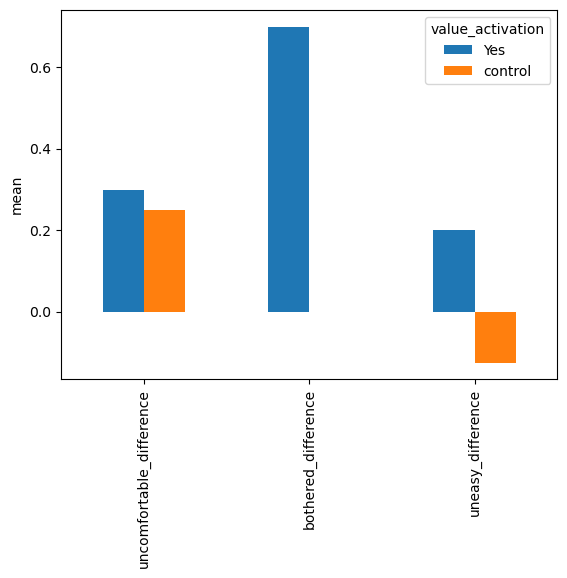

In [54]:
mean_df2 = mean_df[['uncomfortable_difference','bothered_difference','uneasy_difference']]
mean_df2 = mean_df2.transpose()

ax = mean_df2.plot.bar()
ax.set_ylabel("mean")

In [45]:
for key in variable_values['sandwich'].keys():
    print("value: {}, meaning: {}".format(key, variable_values['sandwich'][key]))

value: 1, meaning: Pesto and Vegetables
value: 2, meaning: Hummus and Cucumber
value: 3, meaning: Ham and Cheese
value: 4, meaning: Cured Beef
value: 5, meaning: No sandwich taken


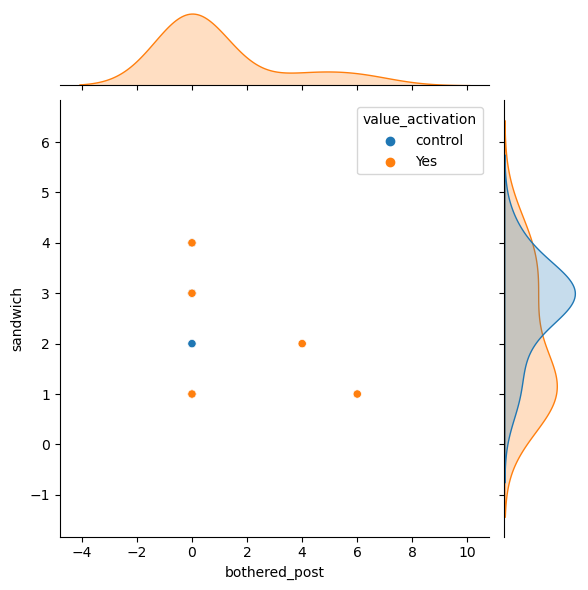

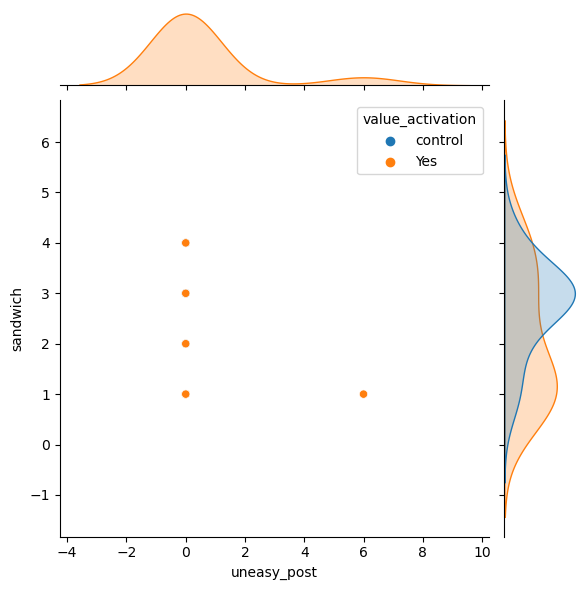

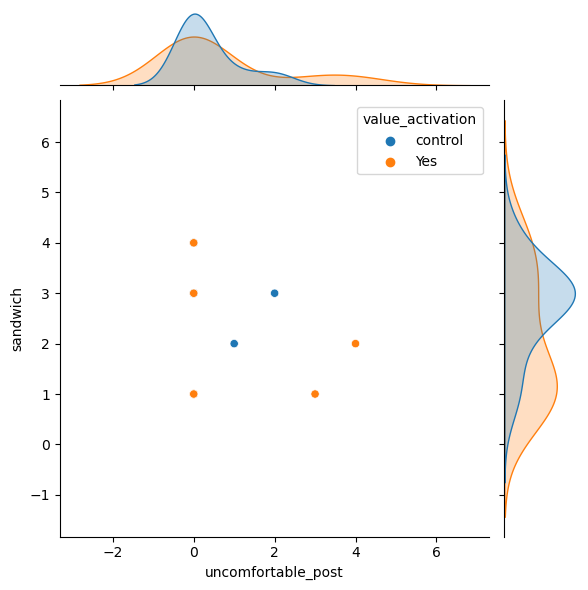

In [14]:
# multivariate analysis

sns.jointplot(data = df, y = 'sandwich', x = 'bothered_post', hue = 'value_activation')
sns.jointplot(data = df, y = 'sandwich', x = 'uneasy_post', hue = 'value_activation')
sns.jointplot(data = df, y = 'sandwich', x = 'uncomfortable_post', hue = 'value_activation')